### NLP Language Detection

### This notebook is the third part of NLP Language detection model 

The data extraction and cleaning parts are same as part2 notebook, explainations for these steps are provided detailly in part 2. We will explain the steps for Neural Networoks in this notebook

In [1]:
## imprt necessary libraries
import pandas as pd
import numpy as np


In [2]:
## import the data downloaded from data processing part 1 notebook
df= pd.read_csv("NLPdata.csv")
df

,text,language
0,"os chefes de defesa da estónia, letónia, lituâ...",Por
1,размерът на хоризонталната мрежа може да бъде ...,Bul
2,สำหรับ ของเก่า ที่ จริงจัง ลอง honeychurch ...,Tha
3,Он увеличил давление .,Rus
4,"S Jak sobie życzysz: Widzisz, jak Hitler zabij...",Pol
...,...,...
102748,narcisa änderte ihre art und weise sie kämpfte...,Ger
102749,Wie' s Narzissmus jetzt erzählt Marian beiden ...,Ger
102750,"Hat sie, ich denke, sie würde jetzt kein Goldb...",Ger
102751,"Terry, du siehst tatsächlich ein bisschen wie ...",Ger


In [3]:
# Check for duplicates based on the 'Text' column
duplicates = df[df.duplicated(subset=['text'], keep=False)]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found.


In [4]:
language_counts = df['language'].value_counts()

print(language_counts)

language
Eng    6880
Fre    6485
Spa    6308
Por    6000
Nep    5999
Rus    5992
Ara    5836
Dut    5783
Tur    5777
Hin    5358
Tha    5305
Urd    5295
Ger    4964
Ita    4954
Gre    4663
Bul    4306
Vie    4306
Swa    4305
Pol    4237
Name: count, dtype: int64


C:\Users\Anita\AppData\Local\Temp\ipykernel_3716\2730671146.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=i, y=language_counts[i] + 30, s=language_counts[i], ha='center', va='bottom', rotation=0, fontsize=10)


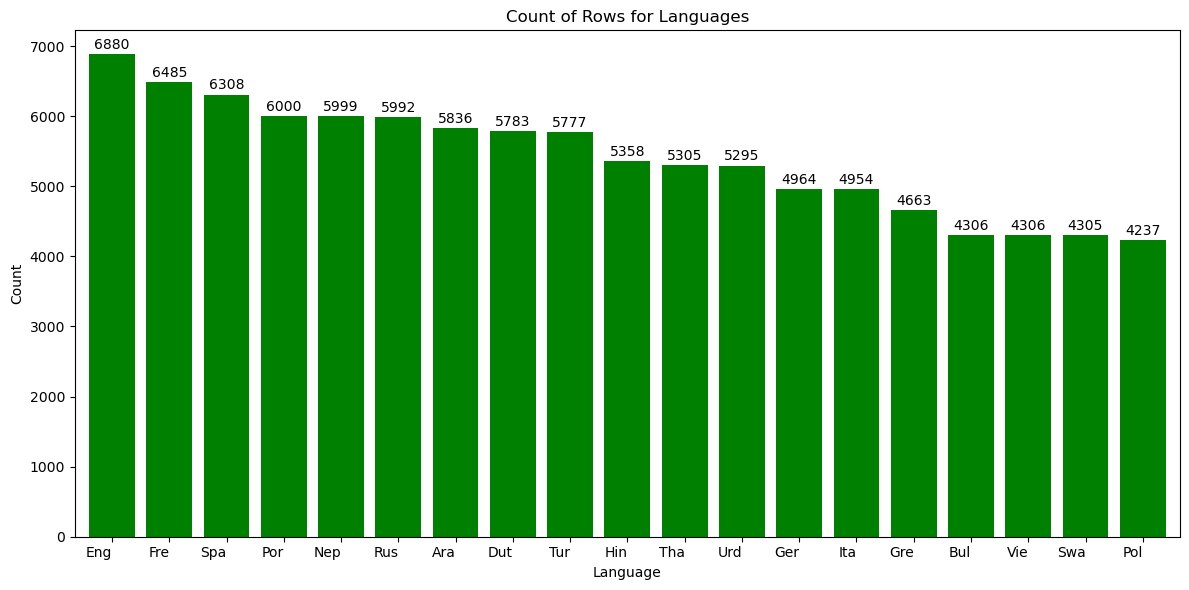

In [5]:
import matplotlib.pyplot as plt

# Define the language counts with the removed languages
language_counts = df['language'].value_counts()

# Plot a bar chart with adjusted size
plt.figure(figsize=(12, 6))  # Adjust the size here (width, height)
bars = language_counts.plot(kind='bar', width=0.8, color="green")
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Count of Rows for Languages')

# Add counts on top of each bar vertically with adjusted font size
for i in range(len(language_counts)):
    plt.text(x=i, y=language_counts[i] + 30, s=language_counts[i], ha='center', va='bottom', rotation=0, fontsize=10)

# Adjust x-axis tick labels rotation for better readability
plt.xticks(rotation=0, ha='right')

plt.tight_layout()
plt.show()

### Data Cleaning process

In [6]:
##1
import re
# Apply regex to remove punctuation and digits, and then convert to lowercase
##filtered_m_data['cleaned_text'] = filtered_m_data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['cleaned_text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: x.lower())

df=df[["cleaned_text","language"]]


In [7]:
import pandas as pd

# Assuming 'filtered_m_data' is your DataFrame

# Define lists of English and non-English languages
english_languages = ['Eng', 'Fre', 'Spa', 'Por', 'Dut', 'Tur', 'Ger', 'Ita', 'Pol', 'Vie', 'Swa']
non_english_languages = ['Ara', 'Hin', 'Tha', 'Urd', 'Nep']
rus_bul= ["Rus", "Bul", "Gre"]

# Filter the DataFrame based on language
english_df = df[df['language'].isin(english_languages)]
non_english_df = df[df['language'].isin(non_english_languages)]
rus_bul_df= df[df['language'].isin(rus_bul)]


In [8]:
english_df['cleaned_text'] = english_df['cleaned_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
english_df['cleaned_text'] = english_df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))
english_df.sample(5)

C:\Users\Anita\AppData\Local\Temp\ipykernel_3716\614825005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_df['cleaned_text'] = english_df['cleaned_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
C:\Users\Anita\AppData\Local\Temp\ipykernel_3716\614825005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_df['cleaned_text'] = english_df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))


,cleaned_text,language
26490,der film haftet sehr gut auf dem display und i...,Ger
35025,os resultados foram divulgados na reunião de t...,Por
67315,ben hayal etmedim,Tur
71868,didnt hold phone at all,Eng
58254,viyana da birkaç neon işareti auuu geoffnet yapar,Tur


In [9]:
import re

# Define a function to remove English words
def remove_english(text):
    # Regular expression to match English words
    english_pattern = r'\b[a-zA-Z]+\b'
    
    # Replace English words with an empty string
    cleaned_text = re.sub(english_pattern, '', text)
    
    return cleaned_text

# Apply the function to the 'cleaned_text' column
rus_bul_df['cleaned_text'] = rus_bul_df['cleaned_text'].apply(remove_english)
rus_bul_df['cleaned_text'] = rus_bul_df['cleaned_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
rus_bul_df1=rus_bul_df
rus_bul_df1.sample(5)

C:\Users\Anita\AppData\Local\Temp\ipykernel_3716\1768760041.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rus_bul_df['cleaned_text'] = rus_bul_df['cleaned_text'].apply(remove_english)
C:\Users\Anita\AppData\Local\Temp\ipykernel_3716\1768760041.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rus_bul_df['cleaned_text'] = rus_bul_df['cleaned_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


,cleaned_text,language
64618,για παράδειγμα λέξεις όπως τι συμβαίνει ή,Gre
100432,позвольте мне немного подумать,Rus
64938,у меня теперь есть младшая дочь и в общем труд...,Rus
60340,μια τέτοια περιστασιακή υπέρβαση ο είναι ένα...,Gre
51604,мисля че е като много неща в съединените щати...,Bul


In [10]:
import re

# Define a function to remove English, Russian, and Hebrew words
def remove_non_target_language(cleaned_text):
    # Regular expression to match English, Russian, and Hebrew words
    pattern = r'\b(?:[a-zA-Z]+|[а-яА-ЯёЁ]+|[א-ת]+)\b'
    # Regular expression to match specified symbols
    pattern_symbols = r'[्#$%^!*()_\-, ् ##–#]+'
    # Replace English, Russian, and Hebrew words wisome special chatracters th an empty string
    cleaned_text = re.sub(pattern, '', cleaned_text)
    
    return cleaned_text

# Apply the function to the 'cleaned_text' column
non_english_df['cleaned_text'] = non_english_df['cleaned_text'].apply(remove_non_target_language)
non_english_df1 = non_english_df
non_english_df1.sample(5)

C:\Users\Anita\AppData\Local\Temp\ipykernel_3716\1097006734.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_english_df['cleaned_text'] = non_english_df['cleaned_text'].apply(remove_non_target_language)


,cleaned_text,language
47490,"मौसम की अनुमति , आप एक में एक सवारी ले सकते ह...",Hin
84344,หลังจากที่ภาคเอนด์เลสวอลซ์ออกฉาย ฮาจิเมะ คาโทก...,Tha
55333,جب تک کہ نئی دنیا کی زندگی میں اہم ہے ، تو ہم ...,Urd
23199,ของ นั้น แพง,Tha
83651,सरकारले ## लाख पर्यटक भित्र्याउन भ्रमण वर्षको ...,Nep


In [11]:
df_finalx= pd.concat([english_df, non_english_df1, rus_bul_df1])
df_finalx

,cleaned_text,language
0,os chefes de defesa da estónia letónia lituâni...,Por
4,jak sobie życzysz widzisz jak hitler zabija żydów,Pol
6,zabuni ya ushindani pia imekuwa rahisi kwa sif...,Swa
7,devasa yüzyıl abbatiale saintpierreetsaintpaul...,Tur
9,duas raças diferentes de cães castanhos branco...,Por
...,...,...
100586,однажды мелли и терри снова пришли встретиться...,Rus
100587,о привет вы двое так скажите нам мэриан,Rus
100588,как теперь нарциссизм мэриан рассказал им обои...,Rus
100589,думаю она не хотела бы больше золотого хлеба а...,Rus


In [12]:
language_counts1 = df_finalx['language'].value_counts()

print(language_counts1)

language
Eng    6880
Fre    6485
Spa    6308
Por    6000
Nep    5999
Rus    5992
Ara    5836
Dut    5783
Tur    5777
Hin    5358
Tha    5305
Urd    5295
Ger    4964
Ita    4954
Gre    4663
Bul    4306
Vie    4306
Swa    4305
Pol    4237
Name: count, dtype: int64


In [14]:
dfx=df_finalx

#### Now the data is ready for train and test part, so we are count vectorizing the data to extract bag of words features
#### In this part we will be splitting the data into 80/20 for train, validationa and test. We will make sure that each language is divided into 80/20 split for the model to be more accurate and more better performance.

In [15]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Assuming df_cleaned contains your DataFrame with "clean_text" and "Language" columns

# Creating numpy arrays for the "cleaned_text" and "Language" columns
x = np.array(dfx["cleaned_text"])
y = np.array(dfx["language"])

# Initialize a CountVectorizer to create bag of word features
cv1 = CountVectorizer()

# Transform the text data into a sparse matrix of token counts
X = cv1.fit_transform(x)

from scipy.sparse import vstack

# Initialize empty sparse matrices for training and testing data
X_train = None
X_test = None
y_train = []
y_test = []

# Split the data for each language into training and testing sets
for lang in np.unique(y):
    # Get the indices corresponding to the current language
    indices = np.where(y == lang)[0]
    
    # Split the indices into training and testing sets with 80-20 split
    train_indices, test_indices = train_test_split(indices, test_size=0.2, random_state=0)
    
    # Extract the corresponding sparse matrices for training and testing
    X_train_lang = X[train_indices]
    X_test_lang = X[test_indices]
    
    # Concatenate sparse matrices for each language
    if X_train is None:
        X_train = X_train_lang
        X_test = X_test_lang
    else:
        X_train = vstack((X_train, X_train_lang))
        X_test = vstack((X_test, X_test_lang))
    
    # Extend the language labels
    y_train.extend(y[train_indices])
    y_test.extend(y[test_indices])

# Convert lists to numpy arrays for language labels
y_train = np.array(y_train)
y_test = np.array(y_test)

# Now X_train and X_test contain the training and testing data with 80-20 split for each language


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define maximum number of words to consider in each text
max_words = 1000

# Convert text data to sequences
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(dfx["cleaned_text"])
X_rnn = tokenizer.texts_to_sequences(dfx["cleaned_text"])

# Pad sequences to ensure uniform length
maxlen = 100
X_rnn = pad_sequences(X_rnn, maxlen=maxlen)

# Define number of classes
num_classes = len(dfx["language"].unique())

# Convert language labels to categorical
label_encoder = LabelEncoder()
y_rnn = label_encoder.fit_transform(dfx["language"])

# Split the data into training and testing sets for each language
X_train_rnn = []
X_test_rnn = []
y_train_rnn = []
y_test_rnn = []

for lang in np.unique(dfx["language"]):
    lang_indices = np.where(dfx["language"] == lang)[0]
    lang_X = X_rnn[lang_indices]
    lang_y = y_rnn[lang_indices]
    
    X_lang_train, X_lang_test, y_lang_train, y_lang_test = train_test_split(lang_X, lang_y, test_size=0.2, random_state=0)
    
    X_train_rnn.append(X_lang_train)
    X_test_rnn.append(X_lang_test)
    y_train_rnn.append(y_lang_train)
    y_test_rnn.append(y_lang_test)

# Concatenate the lists to create the final training and testing sets
X_train_rnn = np.concatenate(X_train_rnn)
X_test_rnn = np.concatenate(X_test_rnn)
y_train_rnn = tf.keras.utils.to_categorical(np.concatenate(y_train_rnn), num_classes=num_classes)
y_test_rnn = tf.keras.utils.to_categorical(np.concatenate(y_test_rnn), num_classes=num_classes)


### RNN LSTM MODEL

In [18]:
## import  necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid

## define the model and its parameters
def create_model(batch_size, epochs, learning_rate=0.001):
    model_rnn = Sequential([
        Embedding(max_words, 64, input_length=maxlen),
        LSTM(128, return_sequences=True),  
        Dropout(0.5),
        LSTM(128),  
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),  
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    optimizer = Adam(learning_rate=learning_rate)  # Specify learning rate here
    model_rnn.compile(optimizer=optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    
    return model_rnn

## Hyper parameter tunning  for the best values 
from sklearn.model_selection import StratifiedKFold

# Define hyperparameters and learning rate to tune
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'learning_rate': [0.001, 0.01, 0.1]  # Add learning rate values to tune
}

'''
best_score = 0
best_params = {}
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
X_train_cross, X_val_cross, y_train_cross, y_val_cross = train_test_split(X_train_rnn, y_train_rnn, test_size=0.3, random_state=42)

# Take only 30% of the training data for cross-validation
X_train_partial, _, y_train_partial, _ = train_test_split(X_train_cross, y_train_cross, test_size=0.3, random_state=42)

from sklearn.model_selection import RepeatedKFold

# Initialize RepeatedKFold for cross-validation on the partial training set
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=42)

# Perform grid search with cross-validation
for params in ParameterGrid(param_grid):
    print(f"Training model with parameters: {params}")
    fold_scores = []
    
    # Iterate over cross-validation folds
    for train_index, val_index in cv.split(X_train_partial):
        X_train_fold, X_val_fold = X_train_partial[train_index], X_train_partial[val_index]
        y_train_fold, y_val_fold = y_train_partial[train_index], y_train_partial[val_index]
        
        # Create and train the model
        model = create_model(**params)
        model.fit(X_train_fold, y_train_fold, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0, validation_data=(X_val_fold, y_val_fold))
        
        # Evaluate the model on the validation data
        _, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
        fold_scores.append(accuracy)
    
    # Average accuracy over folds
    avg_score = np.mean(fold_scores)
    print(f"Average Validation Accuracy: {avg_score}")
    
    # Update best score and parameters if better than current best
    if avg_score > best_score:
        best_score = avg_score
        best_params = params

# Print the best parameters found
print("Best average validation accuracy: %f using %s" % (best_score, best_params))
'''

'\nbest_score = 0\nbest_params = {}\nfrom sklearn.model_selection import train_test_split\n\n# Split the training data into training and validation sets\nX_train_cross, X_val_cross, y_train_cross, y_val_cross = train_test_split(X_train_rnn, y_train_rnn, test_size=0.3, random_state=42)\n\n# Take only 30% of the training data for cross-validation\nX_train_partial, _, y_train_partial, _ = train_test_split(X_train_cross, y_train_cross, test_size=0.3, random_state=42)\n\nfrom sklearn.model_selection import RepeatedKFold\n\n# Initialize RepeatedKFold for cross-validation on the partial training set\ncv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=42)\n\n# Perform grid search with cross-validation\nfor params in ParameterGrid(param_grid):\n    print(f"Training model with parameters: {params}")\n    fold_scores = []\n    \n    # Iterate over cross-validation folds\n    for train_index, val_index in cv.split(X_train_partial):\n        X_train_fold, X_val_fold = X_train_partial[train_in

In [19]:
# Train the model with the best parameters
best_model = create_model(batch_size=32, epochs=20, learning_rate=0.005)
history = best_model.fit(X_train_rnn, y_train_rnn, epochs=20, batch_size=32)

C:\Users\Anita\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 610s 231ms/step - accuracy: 0.6926 - loss: 0.9673
Epoch 2/20
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 637s 248ms/step - accuracy: 0.9164 - loss: 0.2991
Epoch 3/20
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 694s 270ms/step - accuracy: 0.9197 - loss: 0.2832
Epoch 4/20
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 585s 228ms/step - accuracy: 0.9221 - loss: 0.2790
Epoch 5/20
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 503s 196ms/step - accuracy: 0.9202 - loss: 0.2856
Epoch 6/20
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 514s 200ms/step - accuracy: 0.9242 - loss: 0.2668
Epoch 7/20
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 479s 187ms/step - accuracy: 0.9218 - loss: 0.2731
Epoch 8/20
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 466s 182ms/step - accuracy: 0.9217 - loss: 0.2743
Epoch 9/20
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 470s 183ms/step - accuracy: 0.9228 - loss: 0.2757
Epoch 10/20
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 464s 181ms/step - accuracy: 0.9214 - loss: 0.2766
Epoch 11/20
2569/2569 ━━━━━━━━━━━━━━━━━━━━ 461s 179ms/step - accuracy: 0.9203 -

In [20]:
# Obtain training and validation accuracies
training_accuracy = history.history['accuracy']

# Print the training and validation accuracies
print(f"Training Accuracy: {training_accuracy}")


Training Accuracy: [0.8428999185562134, 0.917307436466217, 0.9188525080680847, 0.9217115044593811, 0.9211153984069824, 0.9226239919662476, 0.9210180640220642, 0.9212248921394348, 0.9206530451774597, 0.9212492108345032, 0.9192174673080444, 0.9189255237579346, 0.9194729924201965, 0.9173925518989563, 0.9172952175140381, 0.9187794923782349, 0.9206408858299255, 0.9181955456733704, 0.9191566705703735, 0.9167355895042419]


In [21]:
# Evaluate the model
loss, accuracy = best_model.evaluate(X_test_rnn, y_test_rnn)
print(f"Test Accuracy: {accuracy}")


643/643 ━━━━━━━━━━━━━━━━━━━━ 74s 113ms/step - accuracy: 0.9421 - loss: 0.2100
Test Accuracy: 0.9350099563598633


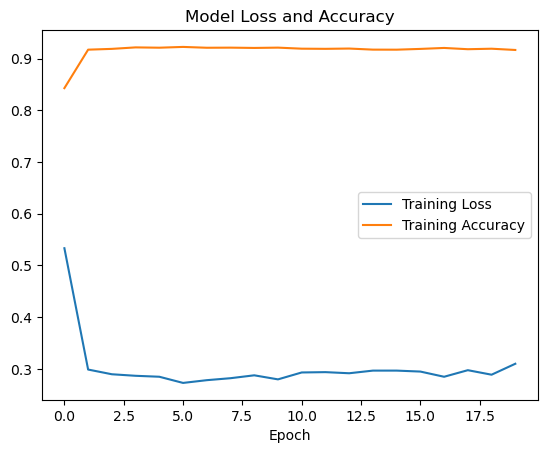

In [22]:
def plot_loss_accuracy(history):
    # Plot training loss
    plt.plot(history.history['loss'], label='Training Loss')
    
    # Plot training accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')

    plt.title('Model Loss and Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

plot_loss_accuracy(history)

In [ ]:
########################### THE END###############################